# Comparing the retrievers
1. Compare the adjacency matrices / graphs returned by the different retrievers


Perform miss-one-out tests on the different distance metrics
1. Do it for the different distance metrics - miss one out

In [48]:
import os
import sys
import pickle
import networkx as nx
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint
from tqdm.auto import tqdm

# Add the project root directory to the system path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from StructuredRag.evaluation import graph_scoring
from StructuredRag.processing import graph_construction
from StructuredRag.processing import distance_metrics

In [4]:
# Select the runs you want to load
for experiment in sorted(os.listdir('../results')):
    print('Experiment:', experiment)
    for run in sorted(os.listdir('../results/' + experiment)):
        print("     || Run:", run)

Experiment: v0
     || Run: 2024-05-10
     || Run: 2024-05-14
     || Run: 2024-05-25
     || Run: 2024-05-27
     || Run: 2024-06-14
     || Run: 2024-07-18
     || Run: 2024-08-03
Experiment: v1
     || Run: 2024-05-10
     || Run: 2024-05-14
Experiment: v3
     || Run: 2024-05-10
     || Run: 2024-05-14
Experiment: v4
     || Run: 2024-05-10
     || Run: 2024-05-14
Experiment: v5
     || Run: 2024-05-14


In [5]:
v0_run = 'v0/2024-08-03'
v1_run = 'v1/2024-05-14'
v3_run = 'v3/2024-05-14'
v4_run = 'v4/2024-05-14'
v5_run = 'v5/2024-05-14'


# Understand distance metrics

In [6]:
v1_data = {}
# Read the data for the specified experiment
for item in os.listdir('../results/' + v1_run):
    print('Loading item:', item.split('.')[0])
    
    with open('../results/' + v1_run + '/' + item, 'rb') as f:
        v1_data[item.split('.')[0]] = pickle.load(f)
    

Loading item: embedded_index
Loading item: notes
Loading item: adj_matrix


In [7]:
fuzz_thresh = 80
distance_df = pd.DataFrame(columns=['name_distance', 'text_distance', 'desc_distance', 'type_distance', 'author_distance', 'topic_distance', 'brand_distance', 'division_distance', 'mpc_round_distance', 'forecast_round_distance', 'date_distance'])

for doc0 in tqdm(v1_data['embedded_index']):
    for doc1 in v1_data['embedded_index']:
        if doc0 != doc1:

            res = pd.DataFrame({
                'name_distance': distance_metrics.node_name_distance(doc0, doc1),
                'text_distance': distance_metrics.node_text_distance(doc0, doc1),
                'desc_distance': distance_metrics.description_distance_metric(doc0, doc1),
                'type_distance': distance_metrics.doctype_distance_metric(doc0, doc1),
                'author_distance': distance_metrics.author_distance_metric(doc0, doc1, fuzz_thresh),
                'topic_distance': distance_metrics.topic_distance_metric(doc0, doc1, fuzz_thresh),
                'brand_distance': distance_metrics.brand_distance_metric(doc0, doc1, fuzz_thresh),
                'division_distance': distance_metrics.division_distance_metric(doc0, doc1, fuzz_thresh),
                'mpc_round_distance': distance_metrics.mpc_round_distance_metric(doc0, doc1),
                'forecast_round_distance': distance_metrics.forecast_round_distance_metric(doc0, doc1),
                'date_distance': distance_metrics.scaled_date_difference(doc0, doc1),
            }, index=[0])
            
                    
            distance_df = pd.concat(
                [distance_df, res]
            )
            
        else:
            continue

  0%|          | 0/197 [00:00<?, ?it/s]

/var/folders/df/j998nyn11sdf0w5cf48pny6m0000gn/T/ipykernel_99923/349447567.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  distance_df = pd.concat(


In [20]:
distance_df = distance_df.reset_index(drop=True)
dist_df = distance_df.copy(deep=True)
dist_df['average'] = dist_df.mean(axis=1)

# Convert all column types to float64
for col in dist_df.columns:
    dist_df[col] = dist_df[col].astype(np.float64)

In [37]:
dist_df.describe()

,name_distance,text_distance,desc_distance,type_distance,author_distance,topic_distance,brand_distance,division_distance,mpc_round_distance,forecast_round_distance,date_distance,average
count,38612.000000,38612.000000,38612.000000,38612.0,38612.0,38612.0,38612.0,38612.0,38612.000000,38612.000000,38612.000000,38612.000000
mean,0.517150,0.457650,0.674264,1.0,1.0,1.0,1.0,1.0,-0.000725,-0.000725,0.370794,0.638037
std,0.482506,0.128255,0.325504,0.0,0.0,0.0,0.0,0.0,1.000013,1.000013,0.819266,0.316552
min,0.035000,-0.038000,0.349000,1.0,1.0,1.0,1.0,1.0,-1.000000,-1.000000,-1.000000,0.213273
25%,0.035000,0.369000,0.349000,1.0,1.0,1.0,1.0,1.0,-1.000000,-1.000000,-1.000000,0.300795
50%,0.035000,0.451500,0.349000,1.0,1.0,1.0,1.0,1.0,-1.000000,-1.000000,0.485000,0.432227
75%,1.000000,0.543000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.950545
max,1.000000,0.998000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.988818


Text(0.5, 0.5, 'TEMPORARY')

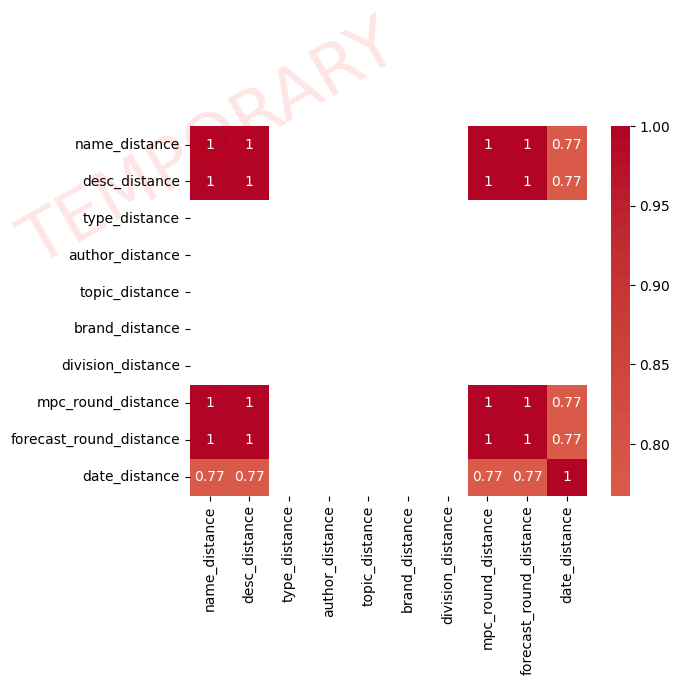

In [99]:
# WHats the correlation between the different distance metrics?
sns.heatmap(dist_df.corr(), annot=True, cmap='coolwarm', center=0)

plt.text(0.5, 0.5, 'TEMPORARY', fontsize=50, color='red', alpha=0.1,
         ha='center', va='center', rotation=30)



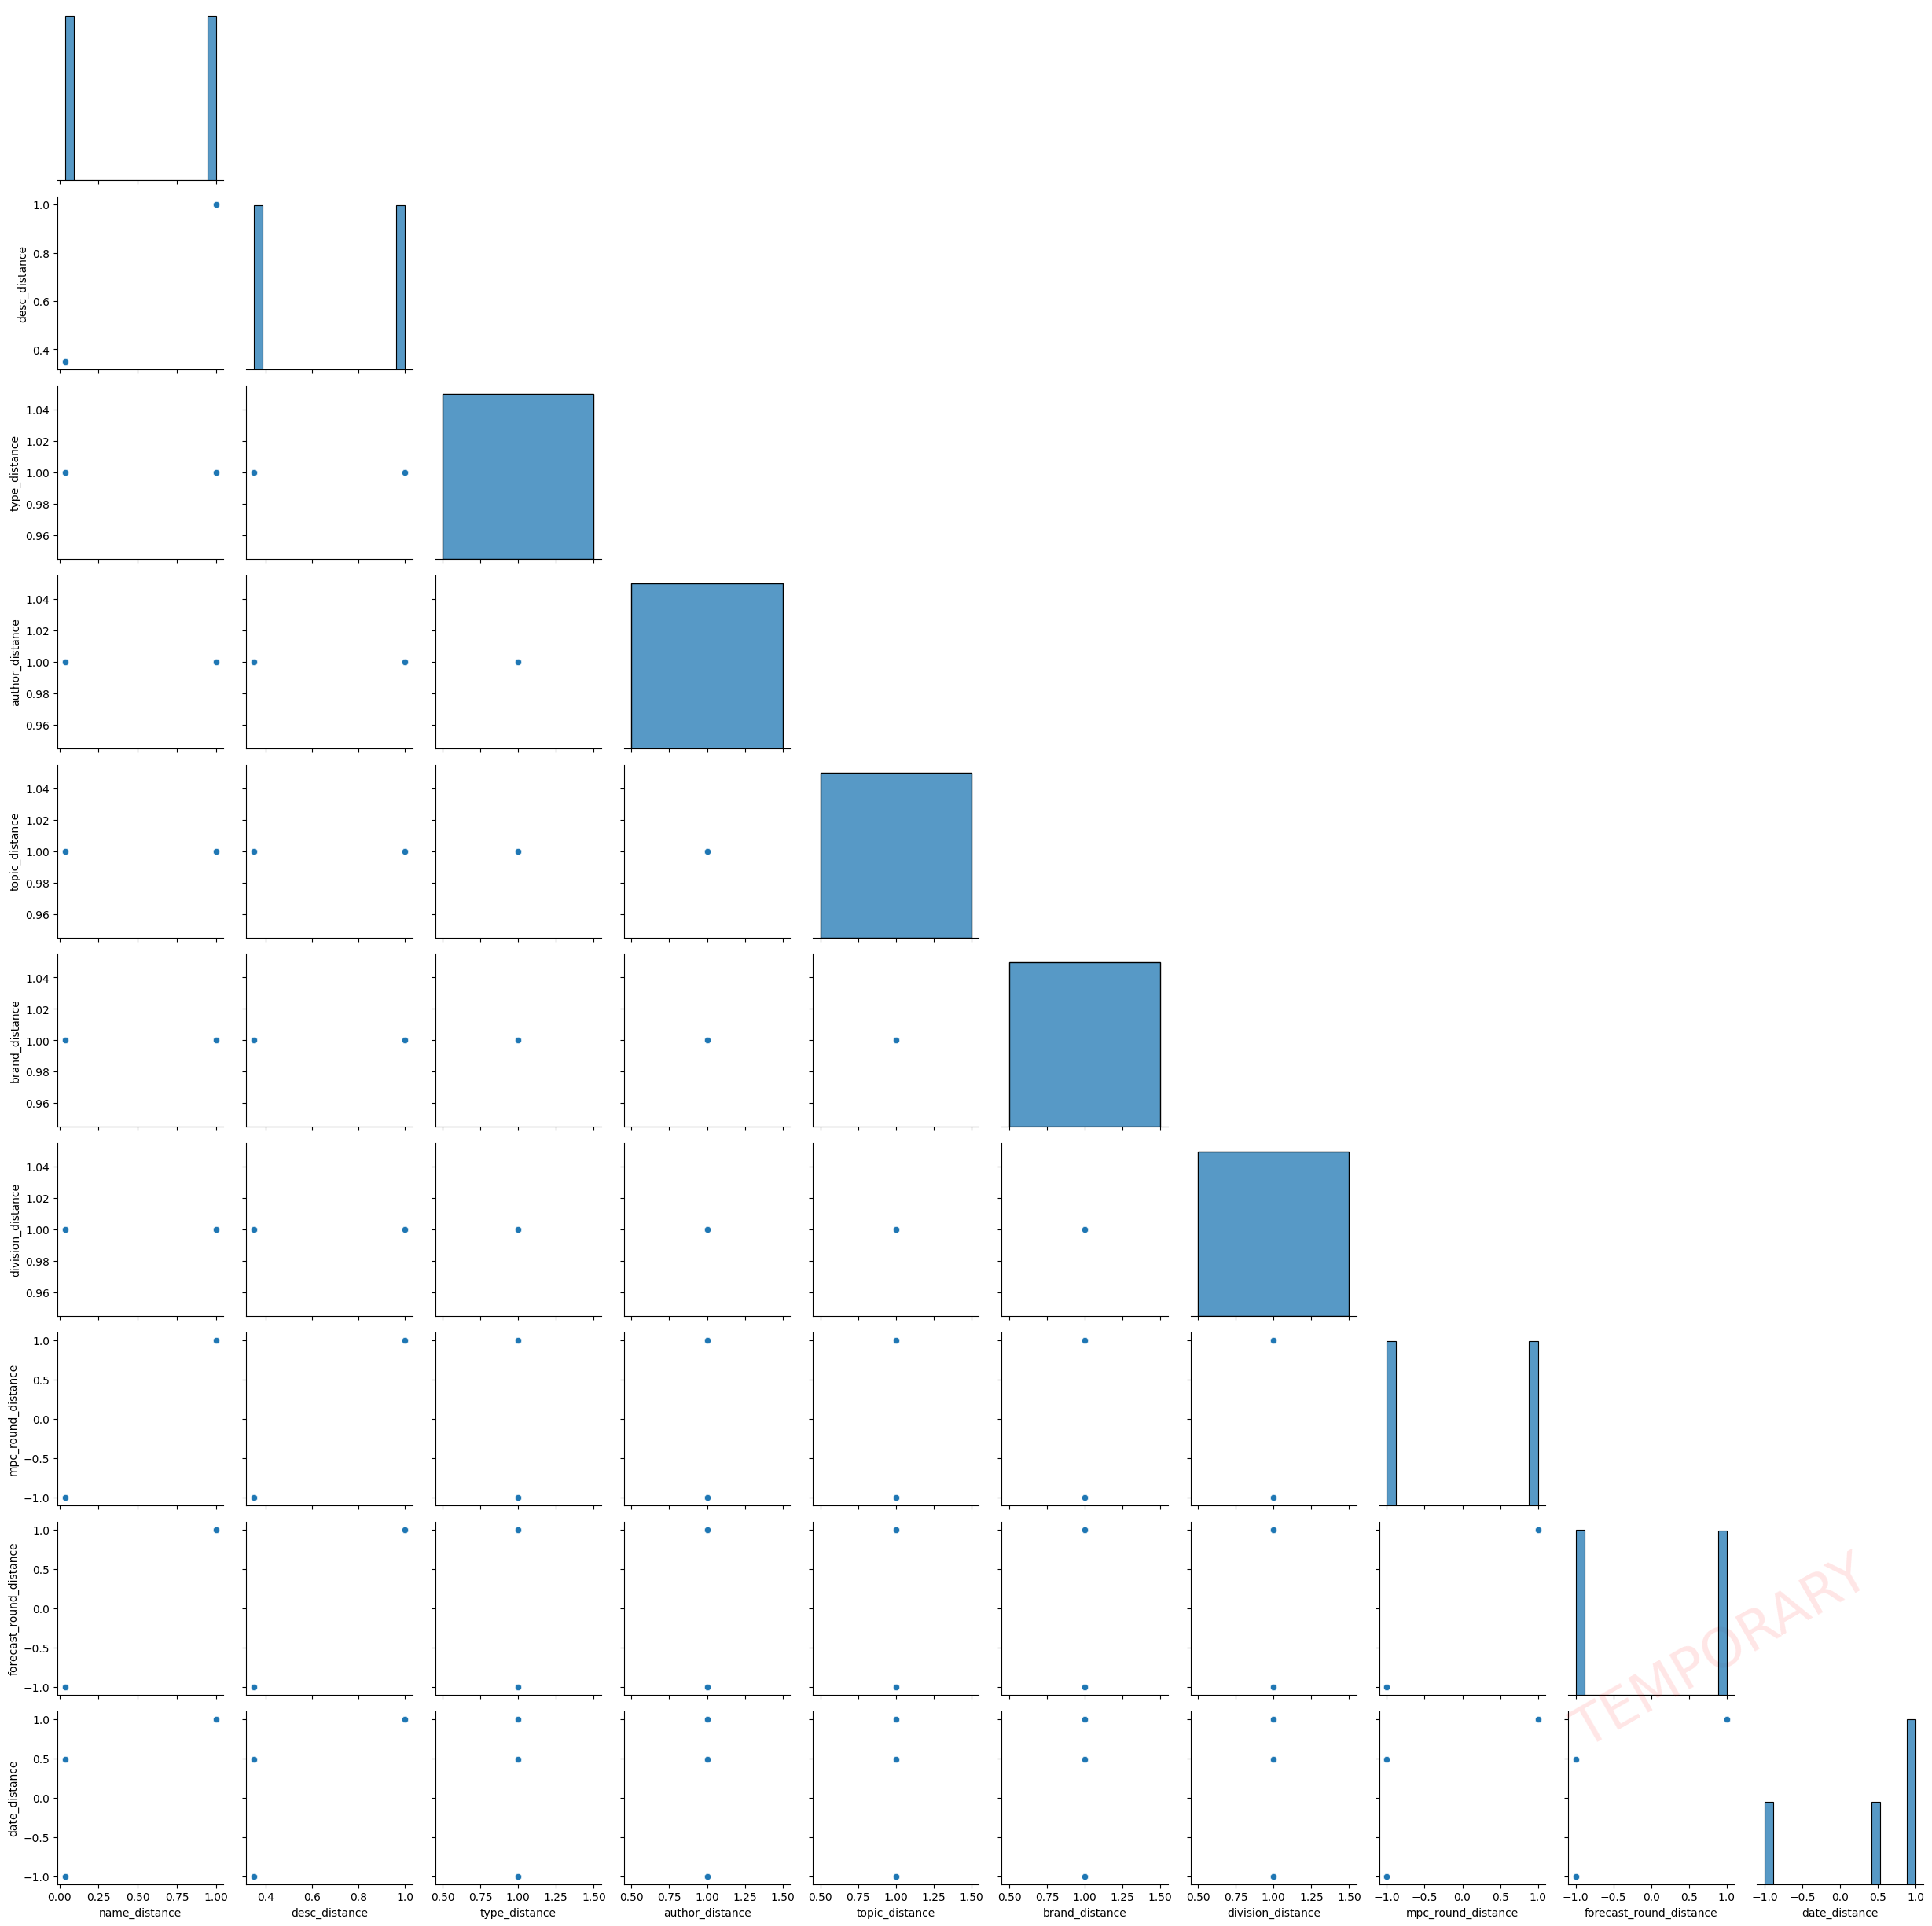

In [104]:
g = sns.PairGrid(dist_df, diag_sharey=False, corner=True)

# Centered text
plt.text(0.5, 0.5, 'TEMPORARY', fontsize=50, color='red', alpha=0.1,
         ha='right', va='bottom', rotation=30)


g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

plt.show()

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [134]:
results_dict = {}
for col in tqdm(distance_df.columns):
    print(f"Predicting {col}")
    
    # Lets try the miss-one-out test
    dist_df = distance_df.copy(deep=True)

    # Convert all column types to float64
    for c in dist_df.columns:
        dist_df[c] = dist_df[c].astype(np.float64)
        
    # # First drop the average column given its just leakage
    # dist_df = dist_df.drop(columns=['average'])
    
    # Next split into target and features -> do name_distance first
    X = pd.DataFrame(dist_df.pop(col))
    Y = dist_df

    # # Linear regression model should be good enough - we just want to understand the relationships
    model = LinearRegression()

    # Define the number of folds
    k = 5

    # Split the data into k folds and perform cross-validation
    scores = cross_val_score(model, Y, X, cv=k, scoring='neg_mean_absolute_percentage_error')
    scores2 = cross_val_score(model, Y, X, cv=k, scoring='neg_mean_squared_error')
    
    print("K-fold cross validation returned a %0.2f MAPE with a standard deviation of %0.2f" % (-scores.mean(), scores.std()))

    # Use statsmodels to get a nice model summary
    model2 = sm.OLS(X, Y)
    # print(model2.fit().summary())
    
    results_dict[col] = {
        'mape': -scores.mean(),
        'mape_std': scores.std(),
        'mse': -scores2.mean(),
        'mse_std': scores2.std(),
    }
    

  0%|          | 0/11 [00:00<?, ?it/s]

Predicting name_distance
K-fold cross validation returned a 0.00 MAPE with a standard deviation of 0.00
Predicting text_distance
K-fold cross validation returned a 0.29 MAPE with a standard deviation of 0.06
Predicting desc_distance
K-fold cross validation returned a 0.00 MAPE with a standard deviation of 0.00
Predicting type_distance
K-fold cross validation returned a -0.00 MAPE with a standard deviation of 0.00
Predicting author_distance
K-fold cross validation returned a -0.00 MAPE with a standard deviation of 0.00
Predicting topic_distance
K-fold cross validation returned a -0.00 MAPE with a standard deviation of 0.00
Predicting brand_distance
K-fold cross validation returned a -0.00 MAPE with a standard deviation of 0.00
Predicting division_distance
K-fold cross validation returned a -0.00 MAPE with a standard deviation of 0.00
Predicting mpc_round_distance
K-fold cross validation returned a 0.00 MAPE with a standard deviation of 0.00
Predicting forecast_round_distance
K-fold cros

/var/folders/df/j998nyn11sdf0w5cf48pny6m0000gn/T/ipykernel_99923/3226901112.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(categories, rotation=45, ha='right')
/var/folders/df/j998nyn11sdf0w5cf48pny6m0000gn/T/ipykernel_99923/3226901112.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(categories, rotation=45, ha='right')


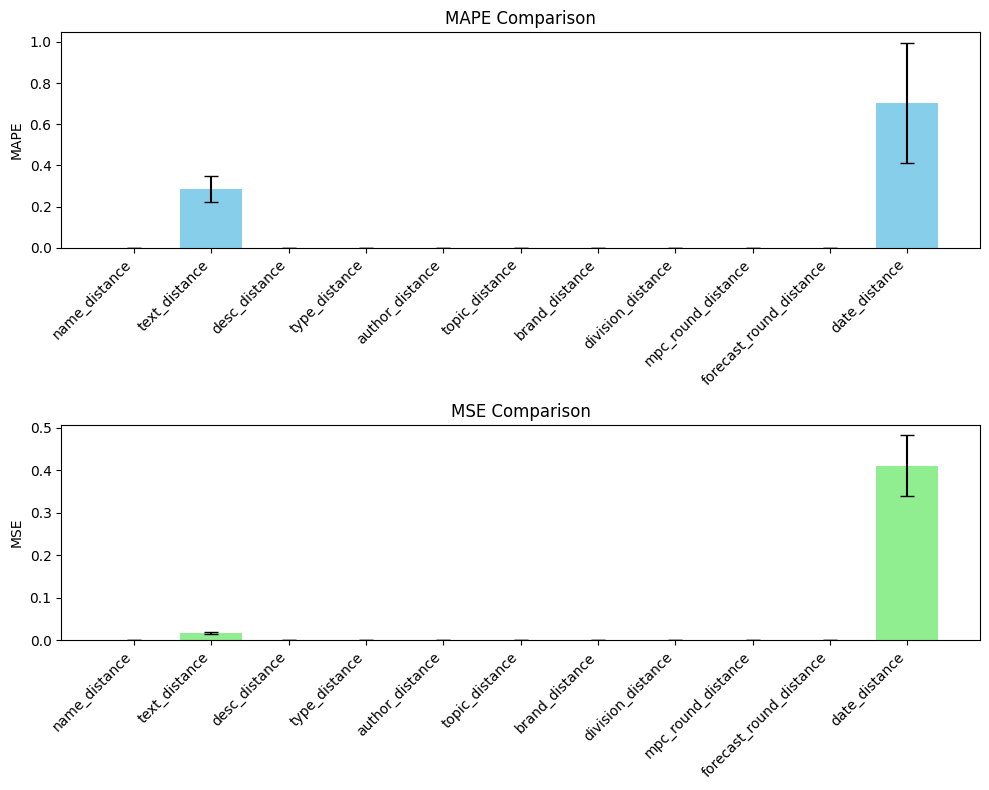

In [135]:
# Extracting data
categories = list(results_dict.keys())
mape_values = [results_dict[cat]['mape'] for cat in categories]
mape_stds = [results_dict[cat]['mape_std'] for cat in categories]
mse_values = [results_dict[cat]['mse'] for cat in categories]
mse_stds = [results_dict[cat]['mse_std'] for cat in categories]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# MAPE bar chart
ax[0].bar(categories, mape_values, yerr=mape_stds, capsize=5, color='skyblue')
ax[0].set_title('MAPE Comparison')
ax[0].set_ylabel('MAPE')
ax[0].set_xticklabels(categories, rotation=45, ha='right')

# MSE bar chart
ax[1].bar(categories, mse_values, yerr=mse_stds, capsize=5, color='lightgreen')
ax[1].set_title('MSE Comparison')
ax[1].set_ylabel('MSE')
ax[1].set_xticklabels(categories, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## V0 distribution

In [115]:
v0_data = {}
# Read the data for the specified experiment
for item in os.listdir('../results/' + v0_run):
    print('Loading item:', item.split('.')[0])
    
    with open('../results/' + v0_run + '/' + item, 'rb') as f:
        v0_data[item.split('.')[0]] = pickle.load(f)

Loading item: embedded_index
Loading item: notes
Loading item: edge_thresh
Loading item: adj_matrix


In [116]:
graph = graph_construction.construct_graph_from_adj_dict(
    adj_dict=data['adj_matrix'],
    edge_thresh=data['edge_thresh'], # -> Needs hyperparameter tuning
    embedded_index=data['embedded_index'],
)
graph_eval = None

graph_scoring.quick_stats(graph)

NameError: name 'data' is not defined

In [ ]:
# Edge weights =
# Get each weight

In [ ]:
data['adj_matrix'][nodes[i]]['01a70a9a-bf94-4bd1-90b2-f88d49506348']['weight']

0.7310883402824402

In [ ]:
# Select out a set of nodes
nodes = list(data['adj_matrix'].keys())

v0_edge_weights = []
# Iterate over the nodes, every other one
for i in range(0, len(nodes), 2):
    try:
        edge_weight = data['adj_matrix'][nodes[i]][nodes[i+1]]['weight']
        v0_edge_weights.append(edge_weight)
    except KeyError:
        continue
    
len(v0_edge_weights)

72

In [ ]:
for node1 in data['adj_matrix']:
    for node1

645df520-ed34-4b42-a42b-f55f9ce7869a


In [ ]:
len(list(data['adj_matrix'].keys()))

440

In [ ]:
graph = graph_construction.construct_graph_from_adj_dict(data['adj_matrix'], edge_thresh=data['edge_thresh'], embedded_index=data['embedded_index'])

Adding edges to graph: 100%|██████████| 440/440 [00:00<00:00, 104489.51it/s]


In [ ]:
graph.number_of_edges()

2156